In [366]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [367]:
df = pd.read_csv('dados/transformado.csv',sep=',',encoding = "UTF-8")

In [368]:
df.tail()

,partida_id,rodada,mandante,visitante,formacao_mandante,formacao_visitante,vencedor,mandante_placar,visitante_placar,chutes_mandante,...,passes_visitante,precisao_passes_visitante,faltas_visitante,cartao_amarelo_visitante,cartao_vermelho_visitante,impedimentos_visitante,escanteios_visitante,temporada,resultado,total_gols
1871,8021,38,Cuiaba,Coritiba,4-1-4-1,4-1-4-1,Cuiaba,2,1,17,...,389,0.82,8,3,1,2,1,2022,1,3
1872,8022,38,Bragantino,Fluminense,4-2-3-1,4-2-3-1,Fluminense,0,1,13,...,463,0.82,15,2,0,0,9,2022,2,1
1873,8023,38,Corinthians,Atletico-MG,4-1-4-1,4-2-3-1,Atletico-MG,0,1,17,...,351,0.82,19,6,0,0,4,2022,2,1
1874,8024,38,Internacional,Palmeiras,4-2-3-1,4-2-3-1,Internacional,3,0,15,...,306,0.82,17,3,0,2,5,2022,1,3
1875,8025,38,Goias,Sao Paulo,4-2-3-1,4-1-2-1-2,Sao Paulo,0,4,6,...,591,0.90,14,1,0,0,4,2022,2,4


In [369]:
print("Temporadas há serem analisadas: ", str(df.temporada.unique()))
print("Total de Partidas:", df.shape[0])
print("Total de Gols :", df.total_gols.sum())
print("Media de Gols por partida :", df.total_gols.mean())

Temporadas há serem analisadas:  [2018 2019 2020 2021 2022]
Total de Partidas: 1876
Total de Gols : 4344
Media de Gols por partida : 2.3155650319829424


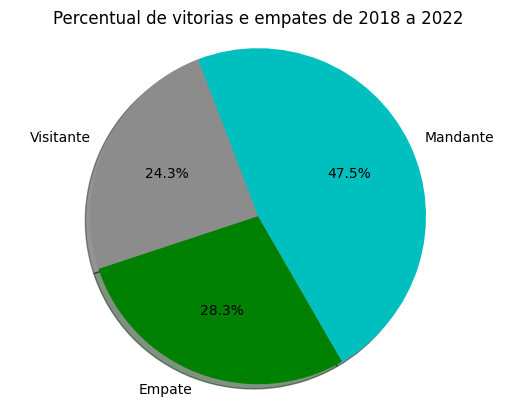

In [370]:
mandante = len(df.resultado[(df['resultado']==1)])
visitante = len(df.resultado[(df['resultado']==2)])
empate = len(df.resultado[(df['resultado']==3)])

sizes  =[mandante,visitante,empate]
label = ["Mandante","Visitante","Empate"]

fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=label,autopct='%1.1f%%', shadow=True,startangle=300,colors=["c",".55","g"])
ax1.set_title("Percentual de vitorias e empates de 2018 a 2022")
ax1.axis('equal')
plt.show()

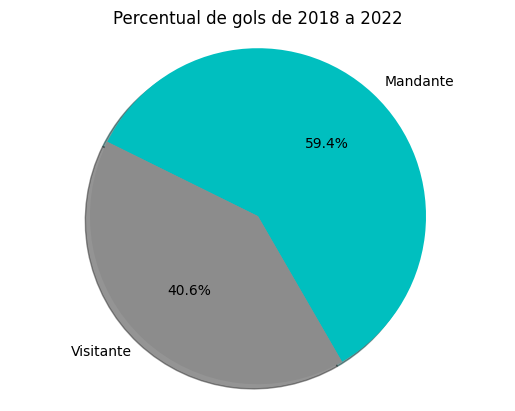

In [371]:
mandante = df.mandante_placar.sum()
visitante = df.visitante_placar.sum()
#visitante = len(df.resultado[(df['']==2)])

sizes  =[mandante,visitante]
label = ["Mandante","Visitante"]

fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=label,autopct='%1.1f%%', shadow=True,startangle=300,colors=["c",".55"])
ax1.set_title("Percentual de gols de 2018 a 2022")
ax1.axis('equal')
plt.show()

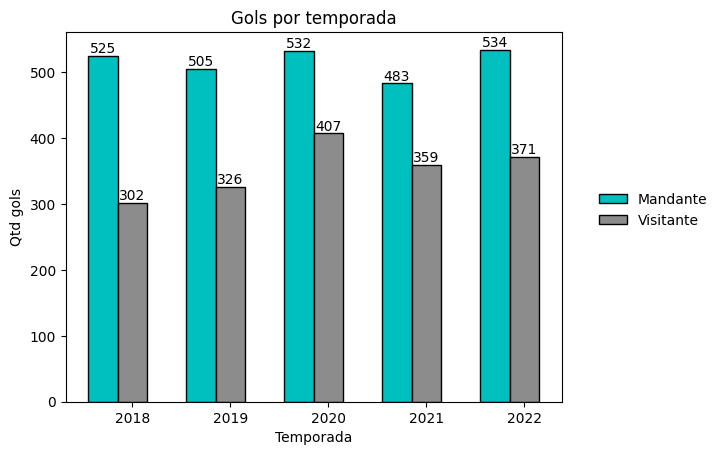

In [372]:
tgols_mandante =  pd.DataFrame(df.groupby([df['temporada']]).agg({"mandante_placar" :'sum'})).reset_index()
tgols_visitante =  pd.DataFrame(df.groupby([df['temporada']]).agg({"visitante_placar" :'sum'})).reset_index()

width = 0.30
r1 = np.arange(len( tgols_mandante['temporada']))
r2 = [x + width for x in r1]

plt1 = plt.bar(r1, tgols_mandante['mandante_placar'], color = 'c', width = width, edgecolor = 'black', label='Mandante')
plt2 = plt.bar(r2, tgols_visitante['visitante_placar'], color = '.55',width = width, edgecolor = 'black', label="Visitante")

plt.xlabel("Temporada")
plt.xticks([r1+ width for r1 in range(len(tgols_mandante))],['2018','2019','2020','2021','2022'])
plt.ylabel("Qtd gols")
plt.title("Gols por temporada")

# colocando o rótulo nas barras
plt.bar_label(plt1, fmt="%.0f", size=10, label_type="edge")
plt.bar_label(plt2, fmt="%.0f", size=10, label_type="edge")
#colocar a legenda fora do enredo 
plt.legend(frameon=False,bbox_to_anchor=(1.05, 0.6) )

plt.show()

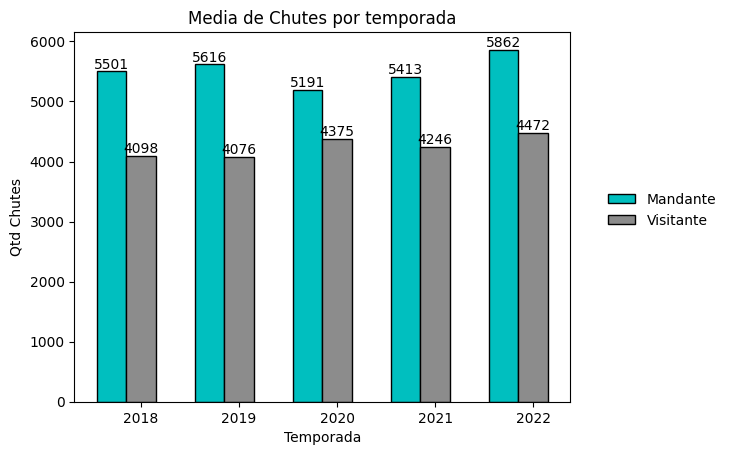

In [373]:
#Chutes e Chutes ao alvo Mandante Visitante
chutes_mandante =  pd.DataFrame(df.groupby([df['temporada']]).agg({"chutes_mandante" :'sum'})).reset_index()
chutes_visitante =  pd.DataFrame(df.groupby([df['temporada']]).agg({"chutes_visitante" :'sum'})).reset_index()

width = 0.30
r1 = np.arange(len( chutes_mandante['temporada']))
r2 = [x + width for x in r1]

plt1 = plt.bar(r1, chutes_mandante['chutes_mandante'], color = 'c', width = width, edgecolor = 'black', label='Mandante')
plt2 = plt.bar(r2, chutes_visitante['chutes_visitante'], color = '.55',width = width, edgecolor = 'black', label="Visitante")

plt.xlabel("Temporada")
plt.xticks([r1+ width for r1 in range(len(tgols_mandante))],['2018','2019','2020','2021','2022'])
plt.ylabel("Qtd Chutes")
plt.title("Media de Chutes por temporada")

# colocando o rótulo nas barras
plt.bar_label(plt1, fmt="%.0f", size=10, label_type="edge")
plt.bar_label(plt2, fmt="%.0f", size=10, label_type="edge")
#colocar a legenda fora do enredo 
plt.legend(frameon=False,bbox_to_anchor=(1.05, 0.6) )

plt.show()

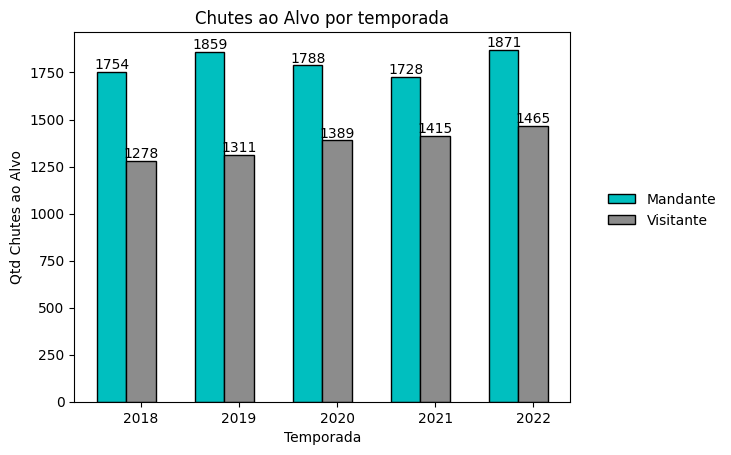

In [374]:
#Chutes ao alvo
chutes_Alvomandante =  pd.DataFrame(df.groupby([df['temporada']]).agg({"chutes_no_alvo_mandante" :'sum'})).reset_index()
chutes_Alvovisitante =  pd.DataFrame(df.groupby([df['temporada']]).agg({"chutes_no_alvo_visitante" :'sum'})).reset_index()


width = 0.30
r1 = np.arange(len( chutes_Alvomandante['temporada']))
r2 = [x + width for x in r1]

plt1 = plt.bar(r1, chutes_Alvomandante['chutes_no_alvo_mandante'], color = 'c', width = width, edgecolor = 'black', label='Mandante')
plt2 = plt.bar(r2, chutes_Alvovisitante['chutes_no_alvo_visitante'], color = '.55',width = width, edgecolor = 'black', label="Visitante")

plt.xlabel("Temporada")
plt.xticks([r1+ width for r1 in range(len(tgols_mandante))],['2018','2019','2020','2021','2022'])
plt.ylabel("Qtd Chutes ao Alvo")
plt.title("Chutes ao Alvo por temporada")

# colocando o rótulo nas barras
plt.bar_label(plt1, fmt="%.0f", size=10, label_type="edge")
plt.bar_label(plt2, fmt="%.0f", size=10, label_type="edge")
#colocar a legenda fora do enredo 
plt.legend(frameon=False,bbox_to_anchor=(1.05, 0.6) )

plt.show()

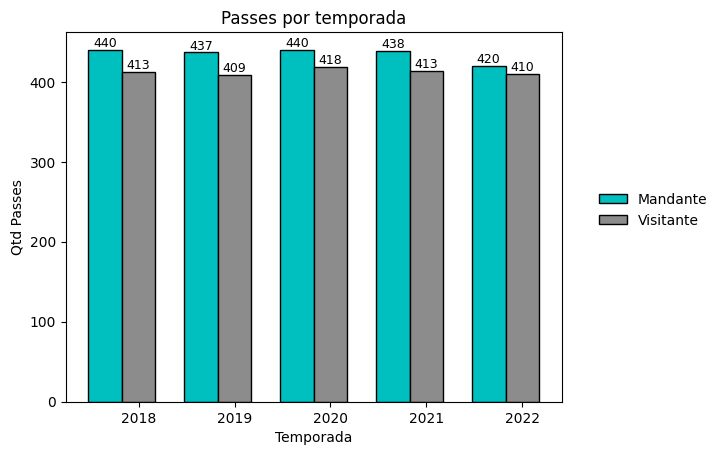

In [375]:
# Passes Mandante e Visitante
passesmandante =  pd.DataFrame(df.groupby([df['temporada']]).agg({"passes_mandante" :'mean'})).reset_index()
passesvisitante =  pd.DataFrame(df.groupby([df['temporada']]).agg({"passes_visitante" :'mean'})).reset_index()

width = 0.35
r1 = np.arange(len( passesmandante['temporada']))
r2 = [x + width for x in r1]

plt1 = plt.bar(r1, passesmandante['passes_mandante'], color = 'c', width = width, edgecolor = 'black', label='Mandante')
plt2 = plt.bar(r2, passesvisitante['passes_visitante'], color = '.55',width = width, edgecolor = 'black', label="Visitante")

plt.xlabel("Temporada")
plt.xticks([r1+ width for r1 in range(len(tgols_mandante))],['2018','2019','2020','2021','2022'])
plt.ylabel("Qtd Passes")
plt.title("Passes por temporada")

# colocando o rótulo nas barras
plt.bar_label(plt1, fmt="%.0f", size=9, label_type="edge")
plt.bar_label(plt2, fmt="%.0f", size=9, label_type="edge")
#colocar a legenda fora do enredo 
plt.legend(frameon=False,bbox_to_anchor=(1.05, 0.6) )

plt.show()

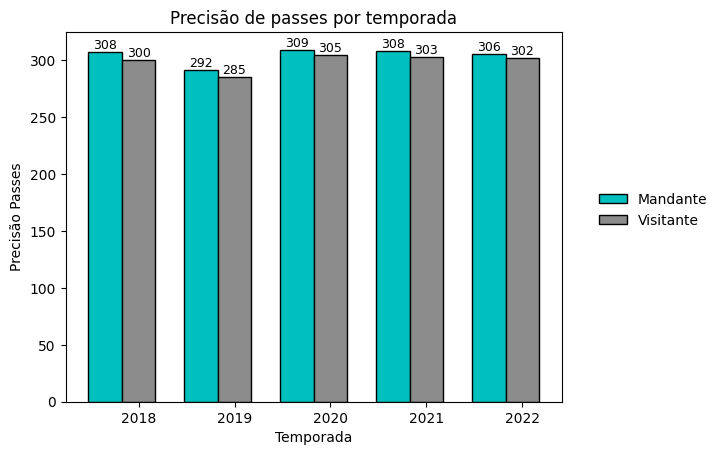

In [376]:
# Precisão de passes Mandante e Visitante
precisao_passesmandante =  pd.DataFrame(df.groupby([df['temporada']]).agg({"precisao_passes_mandante" :'sum'})).reset_index()
precisao_passesvisitante =  pd.DataFrame(df.groupby([df['temporada']]).agg({"precisao_passes_visitante" :'sum'})).reset_index()


width = 0.35
r1 = np.arange(len( precisao_passesmandante['temporada']))
r2 = [x + width for x in r1]

plt1 = plt.bar(r1, precisao_passesmandante['precisao_passes_mandante'], color = 'c', width = width, edgecolor = 'black', label='Mandante')
plt2 = plt.bar(r2, precisao_passesvisitante['precisao_passes_visitante'], color = '.55',width = width, edgecolor = 'black', label="Visitante")

plt.xlabel("Temporada")
plt.xticks([r1+ width for r1 in range(len(precisao_passesmandante))],['2018','2019','2020','2021','2022'])
plt.ylabel("Precisão Passes")
plt.title("Precisão de passes por temporada")

# colocando o rótulo nas barras
plt.bar_label(plt1, fmt="%.0f", size=9, label_type="edge")
plt.bar_label(plt2, fmt="%.0f", size=9, label_type="edge")
#colocar a legenda fora do enredo 
plt.legend(frameon=False,bbox_to_anchor=(1.05, 0.6) )

plt.show()

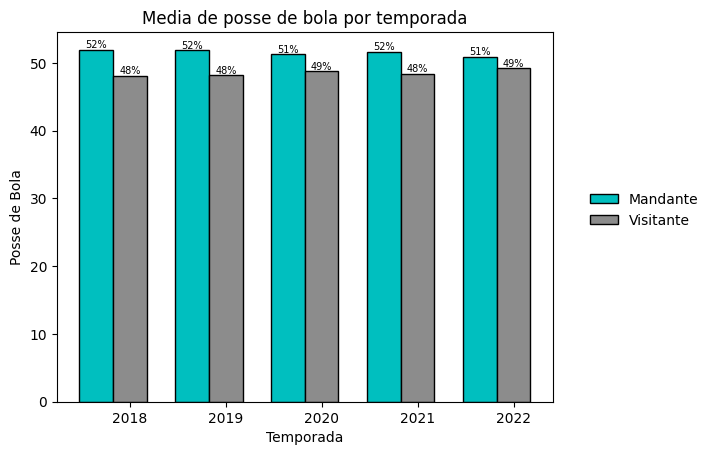

In [377]:
# Posse de bola  Mandante e Visitante
posse_bola_mandante =  pd.DataFrame(df.groupby([df['temporada']]).agg({"posse_de_bola_mandante" :'mean'})).reset_index()
posse_bola_visitante =  pd.DataFrame(df.groupby([df['temporada']]).agg({"posse_de_bola_visitante" :'mean'})).reset_index()

width = 0.35
r1 = np.arange(len( posse_bola_mandante['temporada']))
r2 = [x + width for x in r1]

plt1 = plt.bar(r1, posse_bola_mandante['posse_de_bola_mandante']*100, color = 'c', width = width, edgecolor = 'black', label='Mandante')
plt2 = plt.bar(r2, posse_bola_visitante['posse_de_bola_visitante']*100, color = '.55',width = width, edgecolor = 'black', label="Visitante")

plt.xlabel("Temporada")
plt.xticks([r1+ width for r1 in range(len(posse_bola_mandante))],['2018','2019','2020','2021','2022'])
plt.ylabel("Posse de Bola")
plt.title("Media de posse de bola por temporada")

# colocando o rótulo nas barras
plt.bar_label(plt1, fmt="{:.0f}%", size=7, label_type="edge")
plt.bar_label(plt2, fmt="{:.0f}%", size=7, label_type="edge")
#colocar a legenda fora do enredo 
plt.legend(frameon=False,bbox_to_anchor=(1.05, 0.6) )

plt.show()

In [378]:
#criando dataframe para analisar atributos de vitoria e derrota
dfVitoriaDerrota =  pd.DataFrame(df[['temporada','mandante','visitante','vencedor','precisao_passes_mandante','precisao_passes_visitante','posse_de_bola_mandante','posse_de_bola_visitante','chutes_mandante','chutes_visitante','chutes_no_alvo_mandante','chutes_no_alvo_visitante','visitante_placar','mandante_placar','passes_mandante','passes_visitante']])
dfVitoriaDerrota = dfVitoriaDerrota[(dfVitoriaDerrota['vencedor']!= '-')]


dfVitoriaDerrota['gols_vitoria'] = dfVitoriaDerrota.apply(lambda x: x["mandante_placar"] if x['mandante'] == x['vencedor'] else x['visitante_placar'],axis=1)
dfVitoriaDerrota['gols_derrota'] = dfVitoriaDerrota.apply(lambda x: x["visitante_placar"] if x['mandante'] == x['vencedor'] else x['mandante_placar'],axis=1)

dfVitoriaDerrota['chutes_vitoria'] = dfVitoriaDerrota.apply(lambda x: x["chutes_mandante"] if x['mandante'] == x['vencedor'] else x['chutes_visitante'],axis=1)
dfVitoriaDerrota['chutes_derrota'] = dfVitoriaDerrota.apply(lambda x: x["chutes_visitante"] if x['mandante'] == x['vencedor'] else x['chutes_mandante'],axis=1)

dfVitoriaDerrota['chutes_no_alvo_vitoria'] = dfVitoriaDerrota.apply(lambda x: x["chutes_no_alvo_mandante"] if x['mandante'] == x['vencedor'] else x['chutes_no_alvo_visitante'],axis=1)
dfVitoriaDerrota['chutes_no_alvo_derrota'] = dfVitoriaDerrota.apply(lambda x: x["chutes_no_alvo_visitante"] if x['mandante'] == x['vencedor'] else x['chutes_no_alvo_mandante'],axis=1)

#quantos chutes eu preciso para fazer um gol.
dfVitoriaDerrota['chute_para_gol_vitoria'] = dfVitoriaDerrota.apply(lambda x: (x['chutes_vitoria']/x['gols_vitoria']) if x['gols_vitoria'] != 0 else 0 ,axis=1)
dfVitoriaDerrota['chute_para_gol_derrota'] = dfVitoriaDerrota.apply(lambda x: (x['chutes_derrota']/x['gols_derrota']) if x['gols_derrota'] != 0 else 0 ,axis=1)


dfVitoriaDerrota['passes_vitoria'] = dfVitoriaDerrota.apply(lambda x: x["passes_mandante"] if x['mandante'] == x['vencedor'] else x['passes_visitante'],axis=1)
dfVitoriaDerrota['passes_derrota'] = dfVitoriaDerrota.apply(lambda x: x["passes_visitante"] if x['mandante'] == x['vencedor'] else x['passes_mandante'],axis=1)

dfVitoriaDerrota['precisao_passes_vitoria'] = dfVitoriaDerrota.apply(lambda x: x["precisao_passes_mandante"] if x['mandante'] == x['vencedor'] else x['precisao_passes_visitante'],axis=1)
dfVitoriaDerrota['precisao_passes_derrota'] = dfVitoriaDerrota.apply(lambda x: x["precisao_passes_visitante"] if x['mandante'] == x['vencedor'] else x['precisao_passes_mandante'],axis=1)

dfVitoriaDerrota['possebola_vitoria'] = dfVitoriaDerrota.apply(lambda x: x["posse_de_bola_mandante"] if x['mandante'] == x['vencedor'] else x['posse_de_bola_visitante'],axis=1)
dfVitoriaDerrota['possebola_derrota'] = dfVitoriaDerrota.apply(lambda x: x["posse_de_bola_visitante"] if x['mandante'] == x['vencedor'] else x['posse_de_bola_mandante'],axis=1)

dfVitoriaDerrota.drop(columns=['mandante','visitante','vencedor','precisao_passes_mandante','precisao_passes_visitante','posse_de_bola_mandante','posse_de_bola_visitante','chutes_mandante','chutes_visitante','chutes_no_alvo_mandante','chutes_no_alvo_visitante','visitante_placar','mandante_placar','passes_mandante','passes_visitante'],inplace=True)

dfVitoriaDerrota


,temporada,gols_vitoria,gols_derrota,chutes_vitoria,chutes_derrota,chutes_no_alvo_vitoria,chutes_no_alvo_derrota,chute_para_gol_vitoria,chute_para_gol_derrota,passes_vitoria,passes_derrota,precisao_passes_vitoria,precisao_passes_derrota,possebola_vitoria,possebola_derrota
0,2018,1,0,6,12,2,2,6.000000,0.0,649,425,0.86,0.81,0.60,0.40
2,2018,2,0,22,10,3,2,11.000000,0.0,532,472,0.90,0.85,0.54,0.46
3,2018,3,0,14,15,4,5,4.666667,0.0,363,580,0.76,0.85,0.38,0.62
4,2018,2,1,19,11,7,6,9.500000,11.0,596,321,0.88,0.78,0.67,0.33
5,2018,2,0,13,12,4,2,6.500000,0.0,412,491,0.75,0.82,0.45,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,2022,2,1,17,4,8,2,8.500000,4.0,505,389,0.88,0.82,0.57,0.43
1872,2022,1,0,8,13,4,4,8.000000,0.0,463,319,0.82,0.77,0.59,0.41
1873,2022,1,0,17,17,7,4,17.000000,0.0,351,494,0.82,0.84,0.41,0.59
1874,2022,3,0,15,11,8,2,5.000000,0.0,287,306,0.77,0.82,0.48,0.52


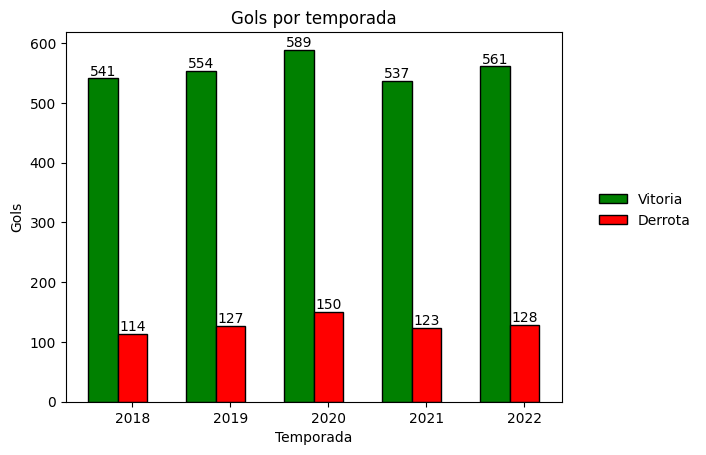

In [379]:
vitoria =  pd.DataFrame(dfVitoriaDerrota.groupby([dfVitoriaDerrota['temporada']]).agg({"gols_vitoria" :'sum'})).reset_index()
derrota =  pd.DataFrame(dfVitoriaDerrota.groupby([dfVitoriaDerrota['temporada']]).agg({"gols_derrota" :'sum'})).reset_index()

width = 0.30
r1 = np.arange(len(derrota['temporada']))
r2 = [x + width for x in r1]

plt1 = plt.bar(r1,vitoria.gols_vitoria, color = 'g', width = width, edgecolor = 'black', label='Vitoria')
plt2 = plt.bar(r2,derrota.gols_derrota, color = 'r',width = width, edgecolor = 'black', label="Derrota")

plt.xlabel("Temporada")
plt.xticks([r1+ width for r1 in range(len(vitoria))],['2018','2019','2020','2021','2022'])
plt.ylabel("Gols")
plt.title("Gols por temporada")

# colocando o rótulo nas barras
plt.bar_label(plt1, fmt="%.0f", size=10, label_type="edge")
plt.bar_label(plt2, fmt="%.0f", size=10, label_type="edge")
#colocar a legenda fora do enredo 
plt.legend(frameon=False,bbox_to_anchor=(1.05, 0.6) )

plt.show()

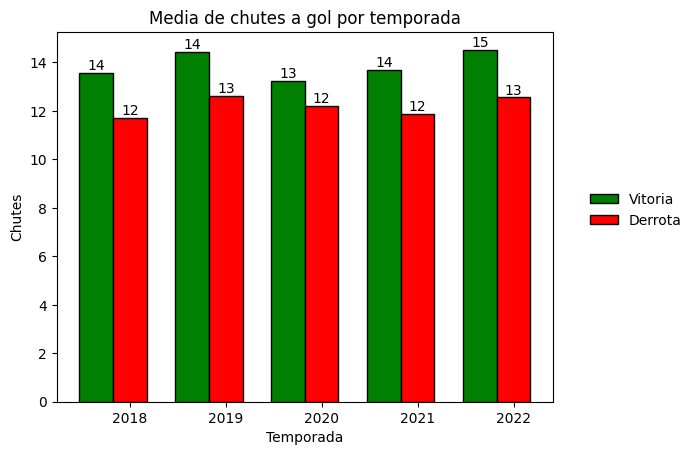

In [380]:
vitoria =  pd.DataFrame(dfVitoriaDerrota.groupby([dfVitoriaDerrota['temporada']]).agg({"chutes_vitoria" :'mean'})).reset_index()
derrota =  pd.DataFrame(dfVitoriaDerrota.groupby([dfVitoriaDerrota['temporada']]).agg({"chutes_derrota" :'mean'})).reset_index()

width = 0.35
r1 = np.arange(len(derrota['temporada']))
r2 = [x + width for x in r1]

plt1 = plt.bar(r1,vitoria.chutes_vitoria, color = 'g', width = width, edgecolor = 'black', label='Vitoria')
plt2 = plt.bar(r2,derrota.chutes_derrota, color = 'r',width = width, edgecolor = 'black', label="Derrota")

plt.xlabel("Temporada")
plt.xticks([r1+ width for r1 in range(len(vitoria))],['2018','2019','2020','2021','2022'])
plt.ylabel("Chutes")
plt.title("Media de chutes a gol por temporada")

# colocando o rótulo nas barras
plt.bar_label(plt1, fmt="%.0f", size=10, label_type="edge")
plt.bar_label(plt2, fmt="%.0f", size=10, label_type="edge")
#colocar a legenda fora do enredo 
plt.legend(frameon=False,bbox_to_anchor=(1.05, 0.6) )

plt.show()

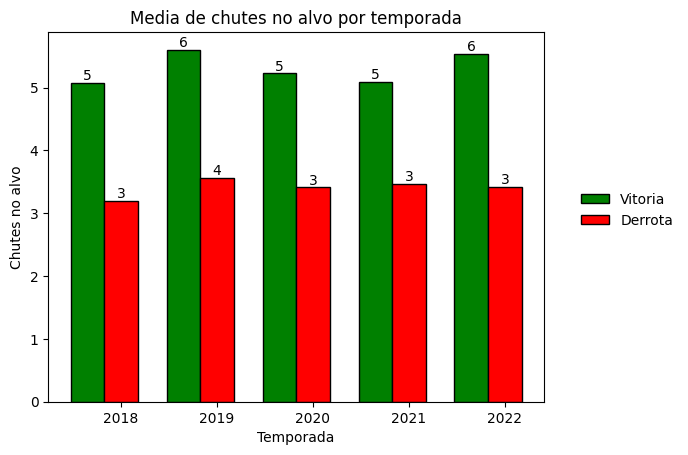

In [381]:
vitoria =  pd.DataFrame(dfVitoriaDerrota.groupby([dfVitoriaDerrota['temporada']]).agg({"chutes_no_alvo_vitoria" :'mean'})).reset_index()
derrota =  pd.DataFrame(dfVitoriaDerrota.groupby([dfVitoriaDerrota['temporada']]).agg({"chutes_no_alvo_derrota" :'mean'})).reset_index()


width = 0.35
r1 = np.arange(len(derrota['temporada']))
r2 = [x + width for x in r1]

plt1 = plt.bar(r1,vitoria.chutes_no_alvo_vitoria, color = 'g', width = width, edgecolor = 'black', label='Vitoria')
plt2 = plt.bar(r2,derrota.chutes_no_alvo_derrota, color = 'r',width = width, edgecolor = 'black', label="Derrota")

plt.xlabel("Temporada")
plt.xticks([r1+ width for r1 in range(len(vitoria))],['2018','2019','2020','2021','2022'])
plt.ylabel("Chutes no alvo")
plt.title("Media de chutes no alvo por temporada")

# colocando o rótulo nas barras
plt.bar_label(plt1, fmt="%.0f", size=10, label_type="edge")
plt.bar_label(plt2, fmt="%.0f", size=10, label_type="edge")
#colocar a legenda fora do enredo 
plt.legend(frameon=False,bbox_to_anchor=(1.05, 0.6) )

plt.show()

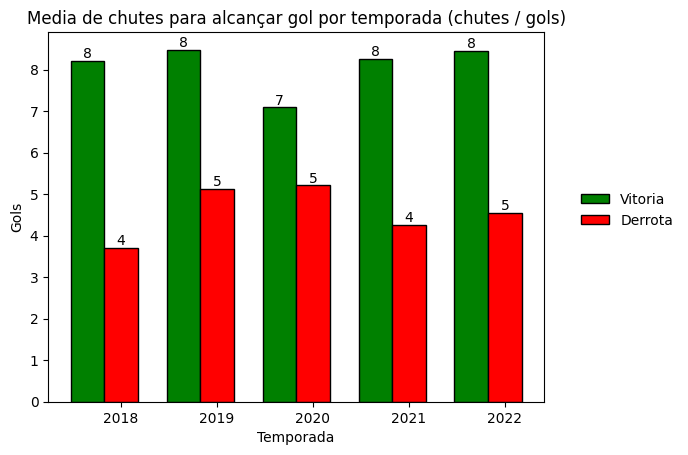

In [382]:
vitoria =  pd.DataFrame(dfVitoriaDerrota.groupby([dfVitoriaDerrota['temporada']]).agg({"chute_para_gol_vitoria" :'mean'})).reset_index()
derrota =  pd.DataFrame(dfVitoriaDerrota.groupby([dfVitoriaDerrota['temporada']]).agg({"chute_para_gol_derrota" :'mean'})).reset_index()

width = 0.35
r1 = np.arange(len(derrota['temporada']))
r2 = [x + width for x in r1]

plt1 = plt.bar(r1,vitoria.chute_para_gol_vitoria, color = 'g', width = width, edgecolor = 'black', label='Vitoria')
plt2 = plt.bar(r2,derrota.chute_para_gol_derrota, color = 'r',width = width, edgecolor = 'black', label="Derrota")

plt.xlabel("Temporada")
plt.xticks([r1+ width for r1 in range(len(vitoria))],['2018','2019','2020','2021','2022'])
plt.ylabel("Gols")
plt.title("Media de chutes para alcançar gol por temporada (chutes / gols)")

# colocando o rótulo nas barras
plt.bar_label(plt1, fmt="%.0f", size=10, label_type="edge")
plt.bar_label(plt2, fmt="%.0f", size=10, label_type="edge")
#colocar a legenda fora do enredo 
plt.legend(frameon=False,bbox_to_anchor=(1.05, 0.6) )

plt.show()

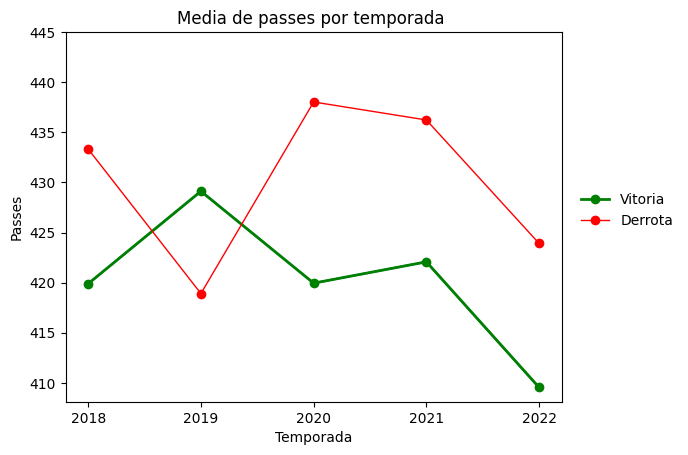

In [383]:
vitoria =  pd.DataFrame(dfVitoriaDerrota.groupby([dfVitoriaDerrota['temporada']]).agg({"passes_vitoria" :'mean'})).reset_index()
derrota =  pd.DataFrame(dfVitoriaDerrota.groupby([dfVitoriaDerrota['temporada']]).agg({"passes_derrota" :'mean'})).reset_index()


x = vitoria.temporada
y =vitoria.passes_vitoria

x1 = derrota.temporada
y1 =derrota.passes_derrota
plt.plot(x,y)

plt.plot(x, y, ls='-', lw='2', marker='o',color='green',label="Vitoria")
plt.plot(x1, y1, ls='-', lw='1', marker='o',color='red',label="Derrota")
plt.xlabel("Temporada")
plt.ylabel("Passes")
plt.title("Media de passes por temporada ")
plt.xticks(list(x))
plt.yticks([410,415,420,425,430,435,440,445])
plt.legend(frameon=False,bbox_to_anchor=(1.25, 0.6) )
plt.show()

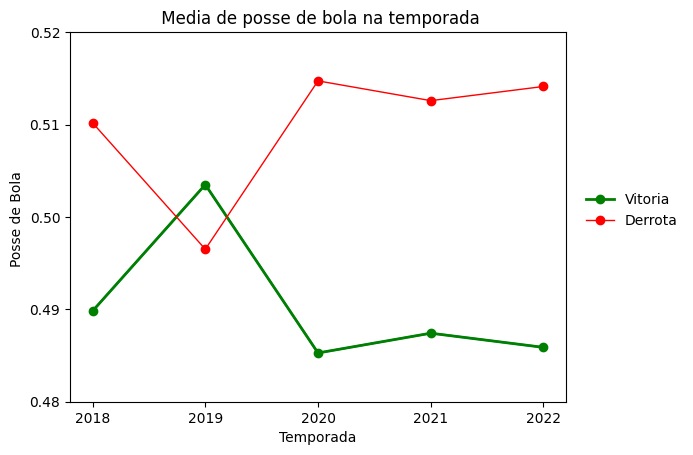

In [384]:
vitoria =  pd.DataFrame(dfVitoriaDerrota.groupby([dfVitoriaDerrota['temporada']]).agg({"possebola_vitoria" :'mean'})).reset_index()
derrota =  pd.DataFrame(dfVitoriaDerrota.groupby([dfVitoriaDerrota['temporada']]).agg({"possebola_derrota" :'mean'})).reset_index()


x = vitoria.temporada
y =vitoria.possebola_vitoria

x1 = derrota.temporada
y1 =derrota.possebola_derrota
plt.plot(x,y)

plt.plot(x, y, ls='-', lw='2', marker='o',color='green',label="Vitoria")
plt.plot(x1, y1, ls='-', lw='1', marker='o',color='red',label="Derrota")
plt.xlabel("Temporada")
plt.ylabel("Posse de Bola ")
plt.title(" Media de posse de bola na temporada")
plt.xticks(list(x))
plt.yticks([.48,.49,.50,.51,.52])
plt.legend(frameon=False,bbox_to_anchor=(1.25, 0.6) )
plt.show()

C:\Users\ADM\AppData\Local\Temp\ipykernel_10852\3095253631.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



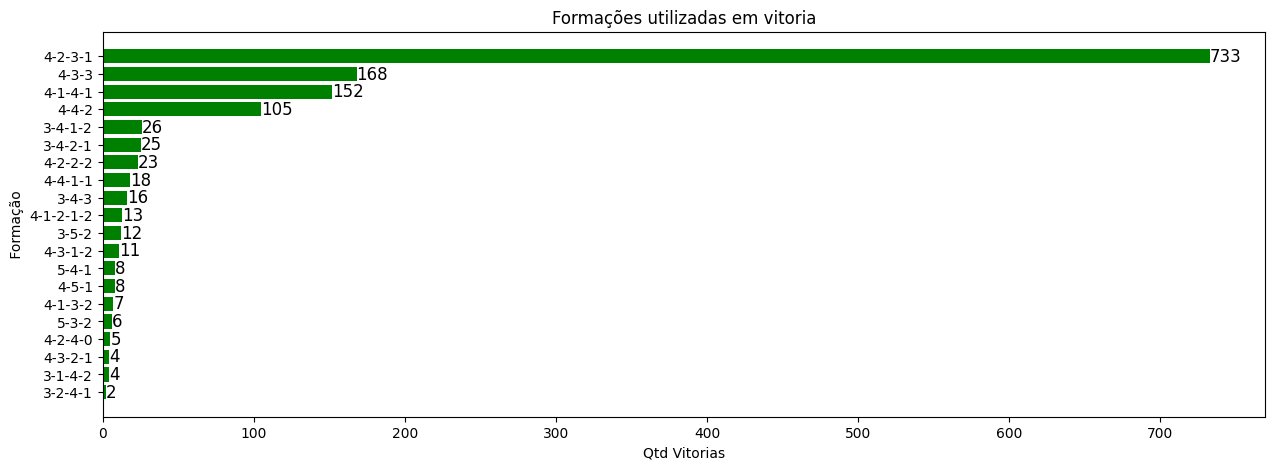

In [385]:
dformacaov = df[['formacao_mandante','formacao_visitante','resultado','temporada']]
dformacaov['formacao_vitoriosa'] = dformacaov.apply(lambda x: x['formacao_mandante'] if x['resultado'] == 1 else x['formacao_visitante'] if x["resultado"] == 2 else '-',axis=1)

tt = pd.DataFrame(dformacaov[(dformacaov['formacao_vitoriosa'] != '-')].groupby(["formacao_vitoriosa"]).agg({'formacao_vitoriosa':'count'}))
tt.rename(columns={'formacao_vitoriosa':'count'},inplace=True)
tt = tt.sort_values(by='count').reset_index()

p = tt['count']
lab = tt.formacao_vitoriosa

f = plt.figure() 
f.set_figwidth(15) 
f.set_figheight(5) 
bb = plt.barh(lab,p,color="green",align='center')
plt.xlabel('Qtd Vitorias')
plt.ylabel(" Formação ")
plt.title("Formações utilizadas em vitoria")
plt.bar_label(bb, fmt="%.0f", size=12, label_type="edge")
plt.show()


# Outras analises
### Formação com maior frequencia (vitoria x derrota)
### Media de Vitorias por Estado

Analisar quantos gols sofridos nos vitoriosos
Gols sofridos para derrotados

Analisar qual os  5 clubes mais vitoriosos/mais derrotados ( Em Média)    - Calculo: totalPartidas / qtdVitorias =  (10 * 2)/100 = 0,20
Comparar Mais Vitorioso com o Menos Vitorioso ( Em Média)

Ideia 1

Com a media total de vitoriosos eu fatio o dataframe em acima da média ou abaixo da média, diante deste fato eu posso analisar os dados
dos vitorios acima da média com os dados dos derrotados que estão abaixo da média.

Porque?
Eu pretendo comprovar com analise dos dados os critérios medianos para se atigir as vitorias, ou seja, o que há de diferente entre os clubes vitorios x clubes derrotados.

Ideia 2

??????

In [386]:
# Criando um dataframe com qtd partidas e qtd vitorias
timem = df.groupby(df['mandante']).agg({'partida_id':'count'}).reset_index()
timev = df.groupby(df['visitante']).agg({'partida_id':'count'}).reset_index()
merg = pd.merge(timem,timev ,how='inner',right_on='visitante',left_on='mandante')
merg['total_partidas'] = merg.apply( lambda x : x['partida_id_x']+ x['partida_id_y'] ,axis=1)
merg = merg.drop(columns=['partida_id_x','visitante','partida_id_y'])
merg.rename(columns={'mandante':'time'},inplace=True)

#retirei o empate para analisar a quantidade de vitorias dos times
vitorias = pd.DataFrame(df[(df['vencedor']!='-')].groupby(df['vencedor']).agg({'vencedor':'count'}))
vitorias.rename(columns={'vencedor':'vitorias'},inplace=True)

# Inner join dos dados
df2 = pd.merge(merg,vitorias ,how='inner',right_on='vencedor',left_on='time')
df2['media'] = df2.apply( lambda x :  x['vitorias'] / x["total_partidas"] ,axis=1 )

df2.sort_values(by="media", inplace=True)
df2 = df2.reset_index(drop=True)


chutes_mandante = df.groupby(df['mandante']).agg({'chutes_mandante':'sum'}).reset_index()
chutes_visitante = df.groupby(df['visitante']).agg({'chutes_visitante':'sum'}).reset_index()


# Definindo status dos times com base na média geral de todos os times
#media_vitorias['vitoria x partidas'] = media_vitorias.apply(lambda x : 'Acima da Média' if x['media']>= 0.3239 else 'Abaixo da Média',axis=1 )
dd = pd.merge(chutes_mandante,chutes_visitante,how='inner',right_on='visitante',left_on='mandante')

#mean 0.3239
#50$ 0.3046

df2 = pd.merge(df2,dd,how="inner",right_on="visitante",left_on='time')

df2['total_chutes'] = df2.apply(lambda x: x['chutes_mandante'] + x['chutes_visitante'] ,axis=1)
df2 = df2.drop(columns=['mandante','visitante','chutes_mandante','chutes_visitante'])


df2

,time,total_partidas,vitorias,media,total_chutes
0,Parana,38,4,0.105263,450
1,Avai,74,11,0.148649,885
2,Chapecoense,113,19,0.168142,1349
3,Juventude,76,14,0.184211,865
4,CSA,35,8,0.228571,392
5,Vitoria,38,9,0.236842,474
6,Coritiba,76,19,0.250000,901
7,Cuiaba,76,20,0.263158,882
8,Ceara,190,52,0.273684,2482
9,Sport,114,32,0.280702,1297


In [387]:
# Importa a biblioteca kmeans
from sklearn.cluster import KMeans
#Valores total partidas e vitorias
mm = df2.iloc[:,1:3].values

# Se não colocarmos o número de clusters, o valor default de número de clusters é de 8 clusters.
modelokm = KMeans(n_clusters=2)

# Cria o modelo de clusterização para agrupar os dados de flores
modelokm = modelokm.fit(mm)

# Mostra quais são as coordenadas de cada centroid para cada dimensão. Temos 2 dimensões e 3 clusters.
modelokm.cluster_centers_

# Mostra a quantidade de clusters
modelokm.n_clusters
labels = modelokm.labels_
# Faz a clusterização dos dados usando o modelo criado
grupos = modelokm.predict(mm)

#print(" Agrupando os clubes em 0 Grupo inferior 1 para grupo superior")
# Mostra o Gráfico de Clusters
#sns.scatterplot(x=mm[:,0], y=mm[:,1], hue=labels)
#plt.show()

C:\Users\ADM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [388]:
# Dividi os times em 1º Grupo e 2º Grupo para 
t = pd.DataFrame(grupos)
t.columns = ['grupo']

df2['grupos'] =  t.apply(lambda x : '1º Grupo' if x['grupo'] == 1 else "2º Grupo",axis=1)

In [389]:
df2[['time','media','grupos']].sort_values(by='grupos').reset_index(drop=True)

,time,media,grupos
0,Botafogo-RJ,0.304636,1º Grupo
1,Atletico-MG,0.483871,1º Grupo
2,Internacional,0.457895,1º Grupo
3,Gremio,0.413333,1º Grupo
4,Fluminense,0.412698,1º Grupo
5,Athletico-PR,0.400000,1º Grupo
6,Sao Paulo,0.393617,1º Grupo
7,Santos,0.384211,1º Grupo
8,Fortaleza,0.377483,1º Grupo
9,Corinthians,0.375661,1º Grupo


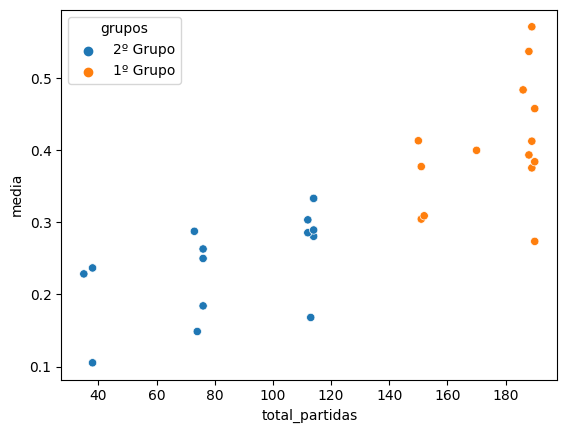

In [390]:
# Compara com o Gráfico anterior
sns.scatterplot(x=df2['total_partidas'], y=df2['media'], hue=df2['grupos'])
plt.show()

In [391]:
attmandante = ['mandante_placar','chutes_mandante','chutes_no_alvo_mandante','posse_de_bola_mandante','passes_mandante','precisao_passes_mandante']
attvisitante = ['visitante_placar','chutes_visitante', 'chutes_no_alvo_visitante', 'posse_de_bola_visitante', 'passes_visitante', 'precisao_passes_visitante']

array([[<Axes: xlabel='mandante_placar', ylabel='mandante_placar'>,
        <Axes: xlabel='chutes_mandante', ylabel='mandante_placar'>,
        <Axes: xlabel='chutes_no_alvo_mandante', ylabel='mandante_placar'>,
        <Axes: xlabel='posse_de_bola_mandante', ylabel='mandante_placar'>,
        <Axes: xlabel='passes_mandante', ylabel='mandante_placar'>,
        <Axes: xlabel='precisao_passes_mandante', ylabel='mandante_placar'>],
       [<Axes: xlabel='mandante_placar', ylabel='chutes_mandante'>,
        <Axes: xlabel='chutes_mandante', ylabel='chutes_mandante'>,
        <Axes: xlabel='chutes_no_alvo_mandante', ylabel='chutes_mandante'>,
        <Axes: xlabel='posse_de_bola_mandante', ylabel='chutes_mandante'>,
        <Axes: xlabel='passes_mandante', ylabel='chutes_mandante'>,
        <Axes: xlabel='precisao_passes_mandante', ylabel='chutes_mandante'>],
       [<Axes: xlabel='mandante_placar', ylabel='chutes_no_alvo_mandante'>,
        <Axes: xlabel='chutes_mandante', ylabel='chutes_no

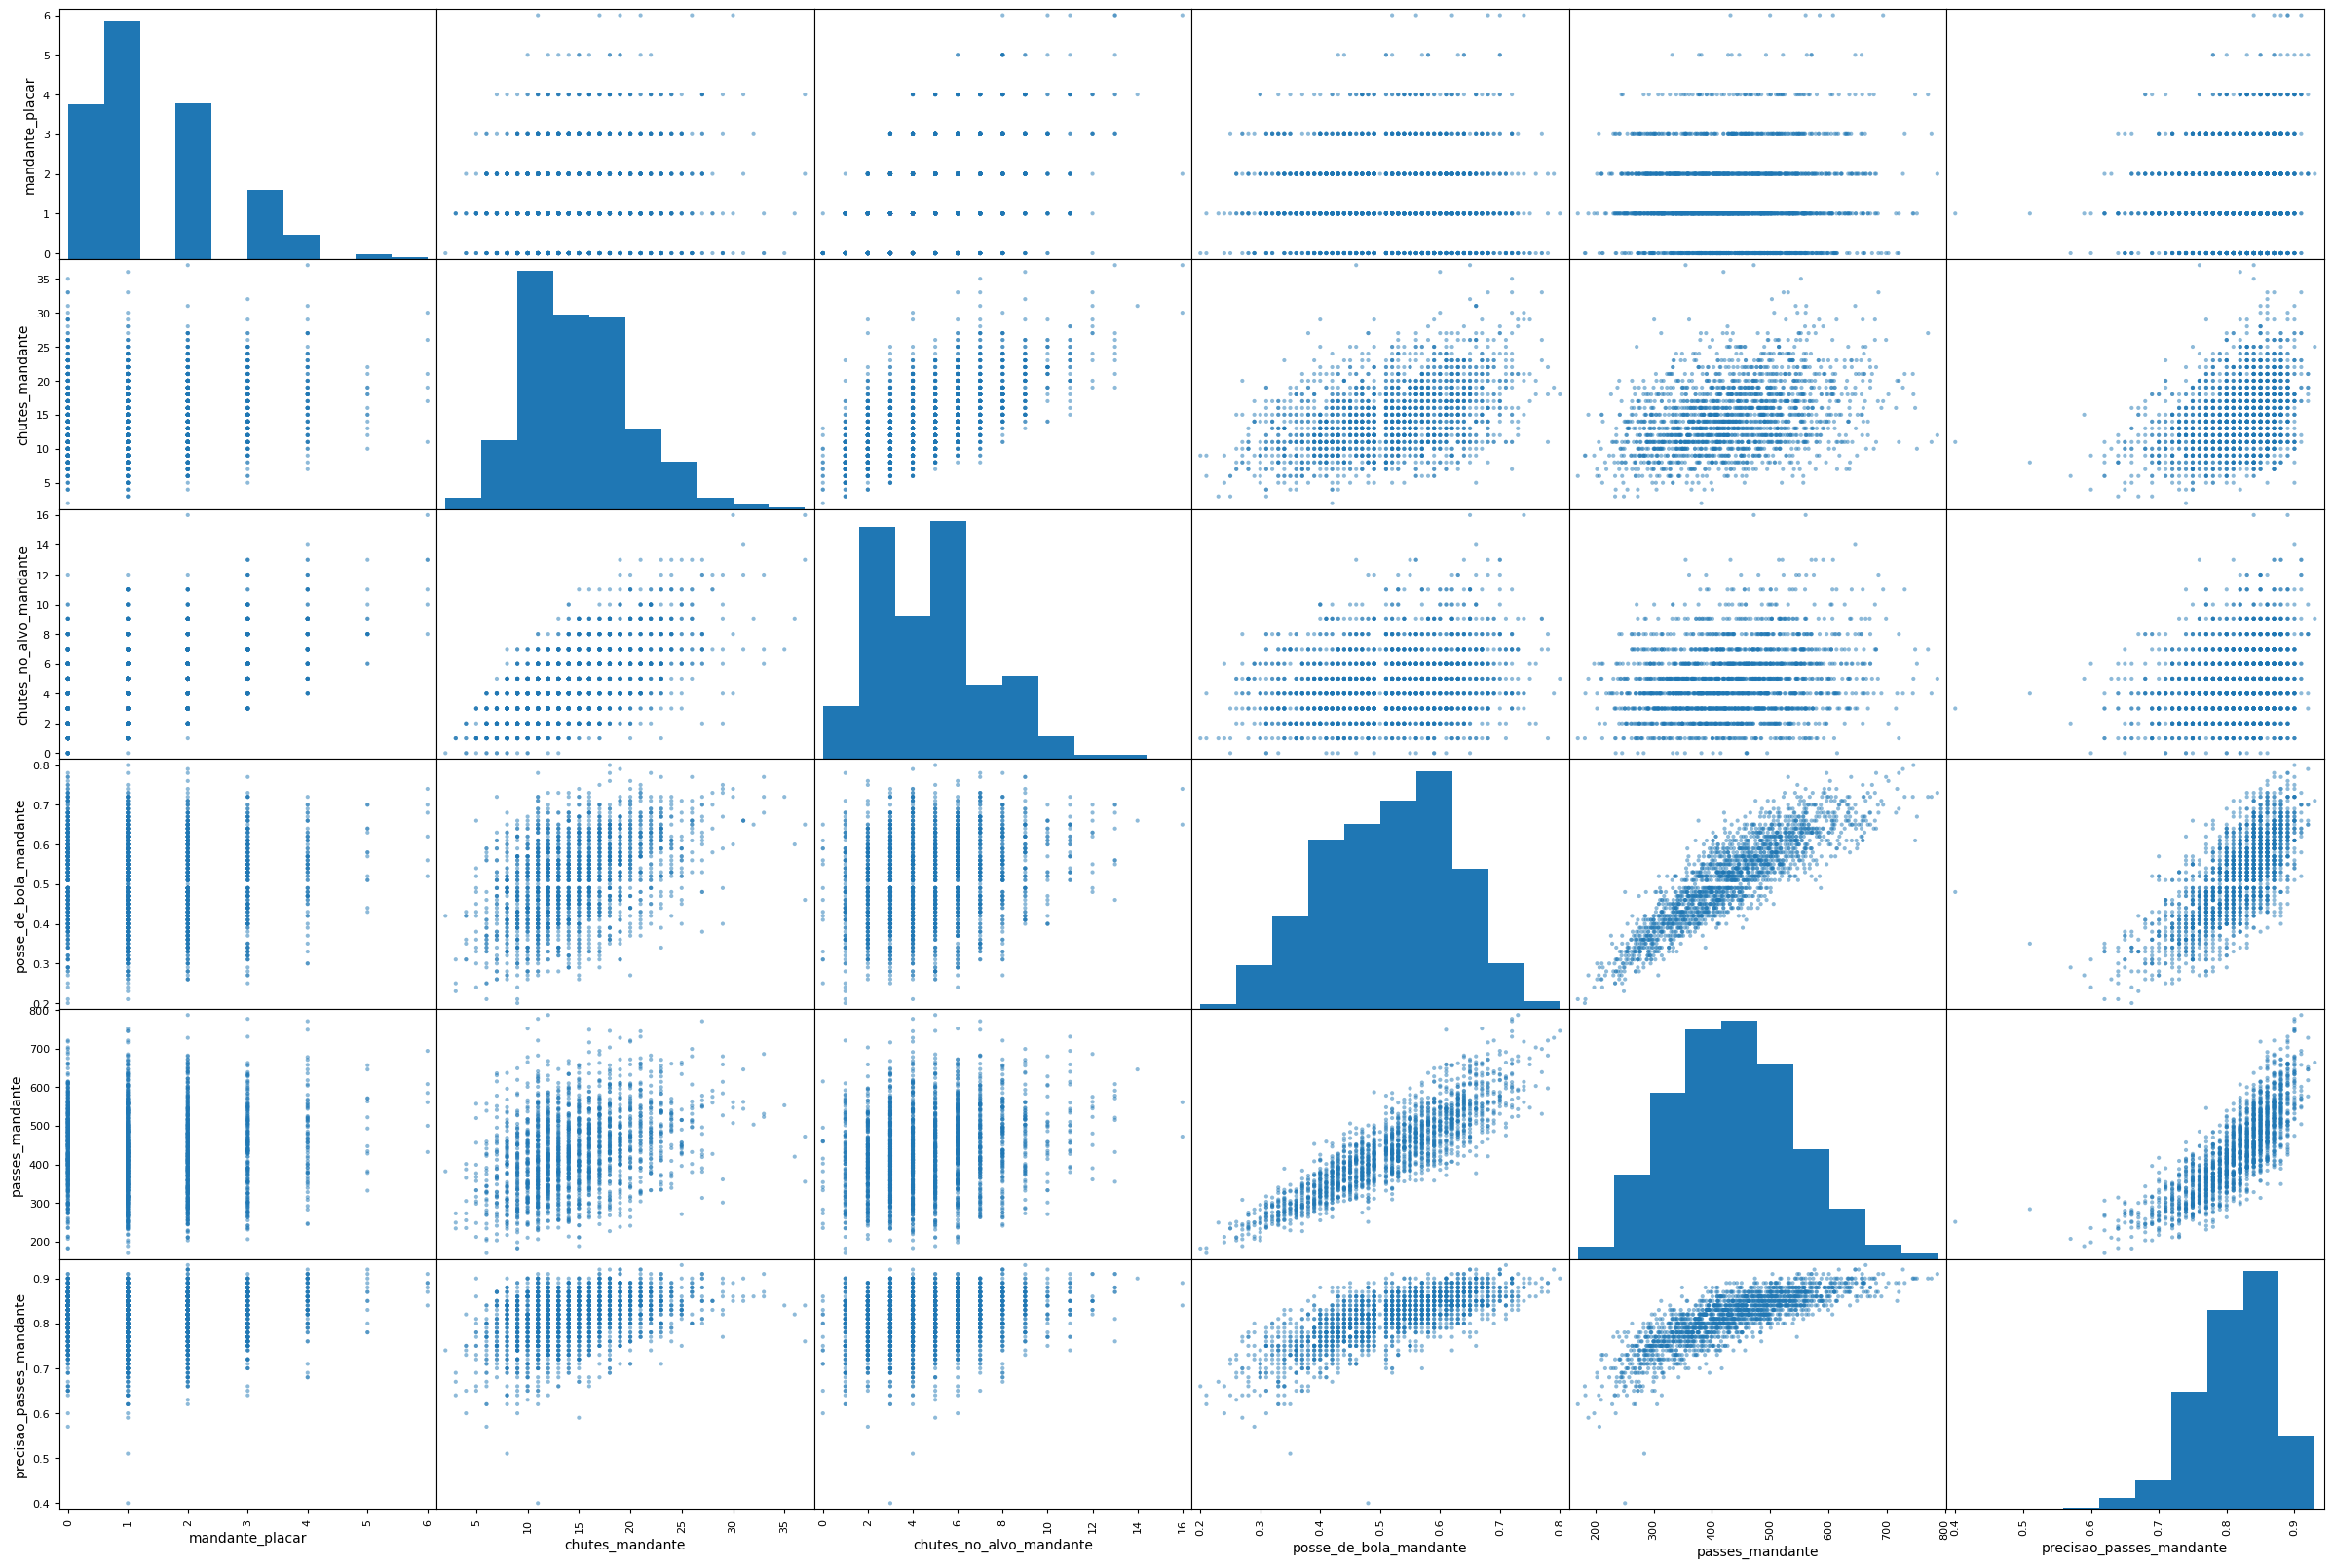

In [392]:
#Distribuição dos mandantes
scatter_matrix(df[attmandante], figsize=(30,20), alpha=0.5)


In [393]:
scatter_matrix(df[attvisitante], figsize=(60,40), alpha=0.5)

array([[<Axes: xlabel='visitante_placar', ylabel='visitante_placar'>,
        <Axes: xlabel='chutes_visitante', ylabel='visitante_placar'>,
        <Axes: xlabel='chutes_no_alvo_visitante', ylabel='visitante_placar'>,
        <Axes: xlabel='posse_de_bola_visitante', ylabel='visitante_placar'>,
        <Axes: xlabel='passes_visitante', ylabel='visitante_placar'>,
        <Axes: xlabel='precisao_passes_visitante', ylabel='visitante_placar'>],
       [<Axes: xlabel='visitante_placar', ylabel='chutes_visitante'>,
        <Axes: xlabel='chutes_visitante', ylabel='chutes_visitante'>,
        <Axes: xlabel='chutes_no_alvo_visitante', ylabel='chutes_visitante'>,
        <Axes: xlabel='posse_de_bola_visitante', ylabel='chutes_visitante'>,
        <Axes: xlabel='passes_visitante', ylabel='chutes_visitante'>,
        <Axes: xlabel='precisao_passes_visitante', ylabel='chutes_visitante'>],
       [<Axes: xlabel='visitante_placar', ylabel='chutes_no_alvo_visitante'>,
        <Axes: xlabel='chutes_vi